In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dotenv
import os
%matplotlib inline

In [2]:
print(dotenv.load_dotenv())
data = pd.read_csv(os.getenv('data_path'))
data.head()

True


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

In [5]:
data.isna().sum().sort_values()

User ID              0
weekday              0
month                0
day                  0
hour                 0
passenger_count      0
pickup_latitude      0
year                 0
pickup_longitude     0
fare_amount          0
key                  0
Traffic Condition    0
Weather              0
Car Condition        0
Driver Name          0
User Name            0
pickup_datetime      0
nyc_dist             5
sol_dist             5
lga_dist             5
dropoff_latitude     5
jfk_dist             5
distance             5
dropoff_longitude    5
ewr_dist             5
bearing              5
dtype: int64

In [6]:
data = data.drop(['User ID'], axis= 1)

In [7]:
data.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [17]:
object_columns = data.drop(['pickup_datetime','key'],axis= 1).select_dtypes(include=['object']).columns
data_cat = data[object_columns]
data_cat

,User Name,Driver Name,Car Condition,Weather,Traffic Condition
0,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic
1,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic
2,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic
3,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic
4,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic
...,...,...,...,...,...
499995,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic
499996,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic
499997,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic
499998,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic


In [15]:
col_num = data.drop(['hour','day', 'month','weekday','year'],axis= 1).select_dtypes(include=['int64','float64']).columns
data_num = data[col_num]
data_num

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,4.5,-1.288826,0.710721,-1.288779,0.710563,1,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,16.9,-1.291824,0.710546,-1.291182,0.711780,1,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,5.7,-1.291242,0.711418,-1.291391,0.711231,2,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,7.7,-1.291319,0.710927,-1.291396,0.711363,1,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,5.3,-1.290987,0.711536,-1.290787,0.711811,1,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,7.0,-1.291173,0.711514,-1.290951,0.711371,1,42.565403,36.580043,17.157511,20.401068,12.280187,1.404709,-2.275706
499996,13.7,-1.291595,0.710670,-1.291708,0.710540,1,41.814877,27.833416,26.463167,8.596656,0.994796,0.994184,2.556931
499997,25.0,-1.291262,0.710796,-1.289737,0.710366,1,31.780108,38.960930,19.708214,19.066488,11.663395,7.859324,-1.926251
499998,6.5,-1.291101,0.711335,-1.291023,0.711480,6,42.292914,36.382813,17.227166,20.006433,11.819775,0.994470,-0.384817


In [16]:
col_time = ['hour','day', 'month','weekday','year']
data_time = data[col_time]
data_time

,hour,day,month,weekday,year
0,17,15,6,0,2009
1,16,5,1,1,2010
2,0,18,8,3,2011
3,4,21,4,5,2012
4,7,9,3,1,2010
...,...,...,...,...,...
499995,18,7,5,3,2015
499996,12,13,9,0,2010
499997,0,25,8,0,2014
499998,12,12,1,0,2015


## Explore the data.

In [18]:
data_cat

,User Name,Driver Name,Car Condition,Weather,Traffic Condition
0,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic
1,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic
2,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic
3,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic
4,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic
...,...,...,...,...,...
499995,Morgan Smith,Gabriel Coleman,Bad,rainy,Dense Traffic
499996,Dillon Jackson,Larry Richards,Very Good,rainy,Flow Traffic
499997,Michael Rodriguez,Lonnie Santana,Bad,rainy,Flow Traffic
499998,Deborah Soto,Emily Rivera,Good,stormy,Congested Traffic


In [29]:
top_driver = data_cat.groupby('Driver Name').size().reset_index(name='trip count')
top_driver_sort = top_driver.sort_values(by='trip count', ascending= False).reset_index().drop(['index'],axis= 1)
top_driver_sort

,Driver Name,trip count
0,Michael Smith,257
1,David Smith,191
2,Michael Johnson,183
3,Michael Williams,167
4,James Smith,164
...,...,...
221695,Jacqueline Bridges,1
221696,Jacqueline Brock,1
221697,Jacqueline Bruce,1
221698,Jacqueline Bryan,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Michael Smith'),
  Text(1, 0, 'David Smith'),
  Text(2, 0, 'Michael Johnson'),
  Text(3, 0, 'Michael Williams'),
  Text(4, 0, 'James Smith'),
  Text(5, 0, 'Christopher Smith'),
  Text(6, 0, 'John Smith'),
  Text(7, 0, 'Jennifer Smith'),
  Text(8, 0, 'Michael Jones'),
  Text(9, 0, 'Robert Smith')])

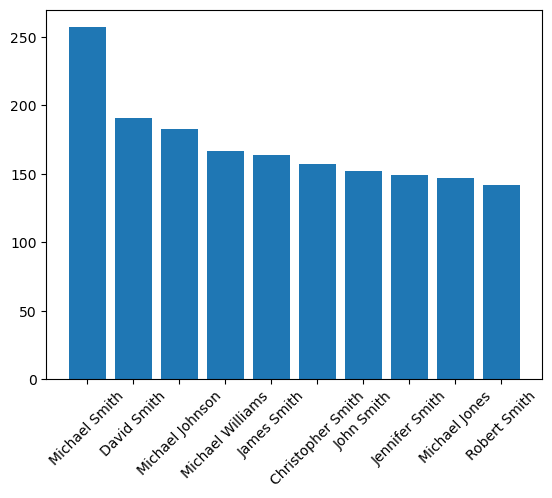

In [33]:
plt.bar(top_driver_sort.iloc[:10]['Driver Name'], top_driver_sort.iloc[:10]['trip count'])
plt.xticks(rotation= 45)

In [56]:
drivers_df = data.groupby('Driver Name')['fare_amount'].agg(['sum','count']).reset_index()
drivers_df['avg_price'] = drivers_df['sum'] / drivers_df['count']
drivers_df= drivers_df.sort_values(by='avg_price', ascending= False).reset_index().drop(['index'],axis= 1)
drivers_df

,Driver Name,sum,count,avg_price
0,Laura Callahan,450.00,1,450.00
1,Cameron Ellis,281.05,1,281.05
2,Melvin Weber,245.41,1,245.41
3,Mary Atkins,211.44,1,211.44
4,Keith Rojas,208.00,1,208.00
...,...,...,...,...
221695,Aimee Duran,-3.00,1,-3.00
221696,Kristin Roberts,-12.20,4,-3.05
221697,Theresa Hogan,-5.00,1,-5.00
221698,Scott Watkins,-12.40,2,-6.20


<p>Let's work with thos who have count > 1 so to make fair results.</p>

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300')])

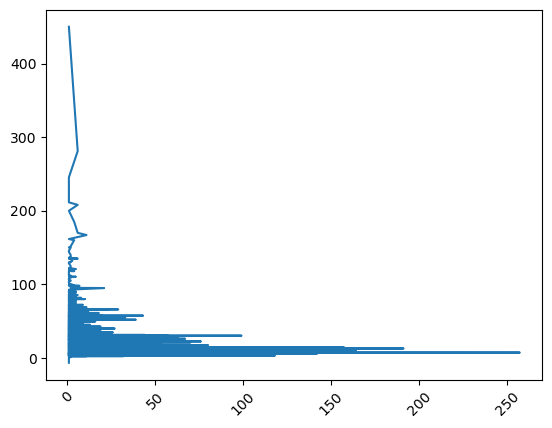

In [59]:
plt.plot(top_driver['trip count'], drivers_df['avg_price'])
plt.xticks(rotation= 45)

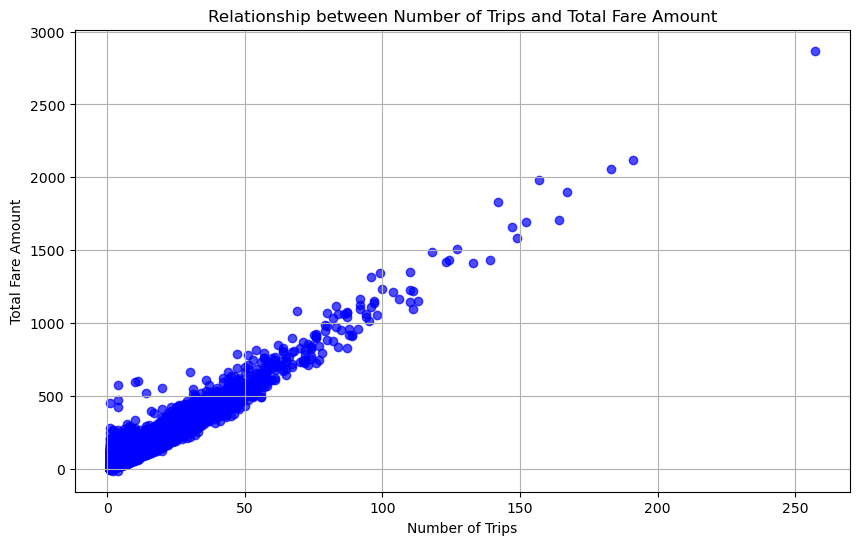

In [64]:
agg_data = data.groupby('Driver Name').agg(
    total_fare_amount=pd.NamedAgg(column='fare_amount', aggfunc='sum'),
    trip_count=pd.NamedAgg(column='fare_amount', aggfunc='count')
).reset_index()

agg_data['avg_price'] = agg_data['total_fare_amount'] / agg_data['trip_count']
# Plot the relationship
plt.figure(figsize=(10, 6))
plt.scatter(agg_data['trip_count'], agg_data['total_fare_amount'], color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Number of Trips')
plt.ylabel('Total Fare Amount')
plt.title('Relationship between Number of Trips and Total Fare Amount')
plt.grid(True)

# Show plot
plt.show()

In [66]:
agg_data

,Driver Name,total_fare_amount,trip_count,avg_price
0,Aaron Acosta,4.9,1,4.900000
1,Aaron Adams,55.7,6,9.283333
2,Aaron Aguilar,8.5,1,8.500000
3,Aaron Aguirre,4.1,1,4.100000
4,Aaron Allen,85.3,6,14.216667
...,...,...,...,...
221695,Zoe Wilkinson,5.5,1,5.500000
221696,Zoe Wilson,6.0,1,6.000000
221697,Zoe Woodard,12.9,1,12.900000
221698,Zoe Wright,9.7,1,9.700000


In [69]:
count_avg = agg_data.groupby('trip_count')['total_fare_amount'].agg(['mean']).reset_index()
count_avg

,trip_count,mean
0,1,11.378184
1,2,22.715240
2,3,34.228220
3,4,45.560659
4,5,56.968882
...,...,...
113,164,1708.780000
114,167,1896.370000
115,183,2059.790000
116,191,2116.960000


Text(0, 0.5, 'Average price')

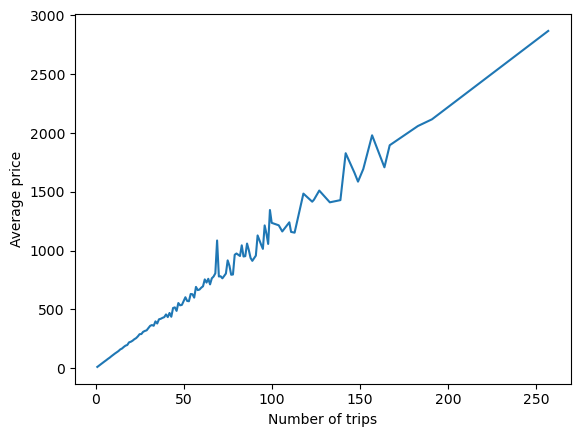

In [71]:
plt.plot(count_avg['trip_count'], count_avg['mean'])
plt.xlabel("Number of trips")
plt.ylabel("Average price")

<p>As the number of trips increase, the average price of a trip increases.</p>

In [72]:
data_cat.columns

Index(['User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition'],
      dtype='object')

In [74]:
car_fare = data.groupby('Car Condition')['fare_amount'].agg(['count','mean']).reset_index()
car_fare.columns = ['Car Condition', 'Number of Trips', 'Average Fare Amount']
car_fare

,Car Condition,Number of Trips,Average Fare Amount
0,Bad,124978,11.326173
1,Excellent,124742,11.355140
2,Good,124968,11.336253
3,Very Good,125312,11.415716


<p> No significant effect on the fare. </p>

In [76]:
weather_fare = data.groupby('Weather')['fare_amount'].agg(['mean']).reset_index()
weather_fare.columns = ['Weather', 'Average Fare Amount']
weather_fare

,Weather,Average Fare Amount
0,cloudy,11.380028
1,rainy,11.357874
2,stormy,11.346383
3,sunny,11.358210
4,windy,11.349251


<p> No significant effect on the fare. </p>

In [79]:
traffic_fare = data.groupby('Traffic Condition')['fare_amount'].agg(['mean']).reset_index()
traffic_fare.columns = ['Traffic', 'Average Fare Amount']
traffic_fare

,Traffic,Average Fare Amount
0,Congested Traffic,11.390527
1,Dense Traffic,11.368120
2,Flow Traffic,11.316381


In [83]:
traffic_weather = pd.crosstab(data_cat['Traffic Condition'], data_cat['Weather'])
traffic_weather

Weather,cloudy,rainy,stormy,sunny,windy
Traffic Condition,,,,,
Congested Traffic,33459,33240,33130,33550,33468
Dense Traffic,33336,33324,33206,33576,33142
Flow Traffic,33267,33408,33619,33307,32968


In [85]:
traffic_car = pd.crosstab(data_cat['Traffic Condition'], data_cat['Car Condition'])
traffic_car

Car Condition,Bad,Excellent,Good,Very Good
Traffic Condition,,,,
Congested Traffic,41508,41739,41843,41757
Dense Traffic,41641,41580,41497,41866
Flow Traffic,41829,41423,41628,41689
